# 형태소 분석기 비교 및 LDA/KR WordRank

## 집업 데이터

In [42]:
import pandas as pd

In [43]:
original  = pd.read_csv('../TOP_ZIPUP_2019.txt', sep = "\n", engine='python', encoding = "utf8")
df = original.dropna(axis = 0).reset_index()
del(df['index'])
df.columns = ['text']
df = df.head(30)
df

,text
0,나이키 배색반집업후리스\t봉봉빈티지 ♥제품명: 나이키 배색반집업후리스 ​ ♥가격: ...
1,어커버 하프집업후리스 :: HALF ZIP UP SILKY FLEECE\tHALF ...
2,[18DAY] 남미배낭여행 (볼리비아 라파즈 데스로드/킬리킬리 야경/라파즈...\t...
3,Made U] 스윗서브 후리스반집업후드-뽀글이 양털 후드티] 털날리는 것...\t상...
4,/choiroom/ 터틀 울 골지 원피스 니트 세트\t뒷면 초이룸의 베스트상품 함께...
5,"남자옷코디 :: 형스타일 양털반집업후리스 오버핏 남자맨투맨추천\t너무 너무 예쁘고,..."
6,나이키 배색반집업후리스\t봉봉빈티지 ♥제품명: 나이키 배색반집업후리스 ​ ♥가격: ...
7,어커버 하프집업후리스 :: HALF ZIP UP SILKY FLEECE\tHALF ...
8,[18DAY] 남미배낭여행 (볼리비아 라파즈 데스로드/킬리킬리 야경/라파즈...\t...
9,Made U] 스윗서브 후리스반집업후드-뽀글이 양털 후드티] 털날리는 것...\t상...


In [44]:
import time
Morph = []
run_time = []

### 형태소 분석기 - Kkma

In [45]:
original  = pd.read_csv('../TOP_ZIPUP_2019.txt', sep = "\n", engine='python', encoding = "utf8")
df = original.dropna(axis = 0).reset_index()
del(df['index'])
df.columns = ['text']
df = df.head(30)

In [46]:
from konlpy.tag import Kkma
from collections import Counter
kkma = Kkma()
POS_PASSWORD1 = ['NNG', 'NNP', 'NP', 'UN', 'OL', 'OH']
"""
@ REFERENCE: http://kkma.snu.ac.kr/documents/?doc=postag
NNG: 보통 명사
NNP: 고유 명사
NP: 대명사
UN: 명사추정범주
OL: 외국어
OH: 한자
"""

def preprocess(string):
    rst = ""
    try:
        vocab_pos = kkma.pos(string)
        for key, tag in vocab_pos:
            # if not(tag in POS_STOPWORD):
            if tag in POS_PASSWORD1:
                rst = rst + key + " "
        return rst
    
    except: return None
    
    
df_Kkma = pd.DataFrame()
start = time.time()
for i in range(len(df)):
    df_Kkma = df_Kkma.append({'text' : preprocess(df['text'][i])}, 
                             ignore_index=True)
Morph.append('Kkma')
run_time.append(time.time()-start)
df_Kkma.head()

,text
0,나이키 배색 반집 업 후 리스 봉 봉 빈티지 제품명 나이키 배색 반집 업 후 리스 ...
1,커버 하프 집 업 후 리스 HALF ZIP UP SILKY FLEECE HALF Z...
2,DAY 남미 배낭여행 볼 리비아 라 파 즈 데스 로드 리 리 야경 라 파 즈 시간 ...
3,Made U 스윗 서브 후 리스 반집 업 후드 양털 후드 티 털 상품명 Made U...
4,choiroom 터틀 골지 원피스 니트 세트 뒷면 이룸 베스트 상품 보기 무 배 반...


In [47]:
run_time

[3.440993547439575]

### 형태소 분석기 - Komoran

In [48]:
original  = pd.read_csv('../TOP_ZIPUP_2019.txt', sep = "\n", engine='python', encoding = "utf8")
df = original.dropna(axis = 0).reset_index()
del(df['index'])
df.columns = ['text']
df = df.head(30)

In [49]:
# PyKomoran 불러오기
# from PyKomoran import *
from konlpy.tag import Komoran

# Komoran 객체 생성
komoran = Komoran()

POS_PASSWORD2 = ['NNG', 'NNP', 'NP', 'SL', 'SH', 'NF']
"""
@ REFERENCE: https://komorandocs.readthedocs.io/ko/latest/firststep/postypes.html
NNG: 일반명사
NNP: 고유명사
NP: 대명사
SL: 외국어
SH: 한자
NF: 명사추정범주
"""
def preprocess2(string):
    rst = ""
    try:
        vocab_pos = komoran.pos(string)
        for key, tag in vocab_pos:
            if tag in POS_PASSWORD2:
                rst = rst + key + " "
            return rst
    except: return None


df_Komoran = pd.DataFrame()
start = time.time()
for i in range(len(df)):
    df_Komoran = df_Komoran.append({'text' : preprocess2(df['text'][i])}, 
                             ignore_index=True)
Morph.append('Komoran')
run_time.append(time.time()-start)
df_Komoran.head()


# df_Komoran = pd.DataFrame()
# start = time.time()
# for i in range(len(df)):
#     # get_morphes_by_tags(): 입력 문장에서 주어진 품사들만 추출합니다.
#     df_Komoran = df_Komoran.append({'text' :
#         komoran.get_morphes_by_tags(df['text'][i], tag_list=POS_PASSWORD2)},
#     ignore_index=True)
# run_time.append(time.time()-start)
# df_Komoran.head()
# """
# # 분석할 문장 준비
# str_to_analyze = "① 대한민국은 민주공화국이다. ② 대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다."

# # get_nouns(): 입력 문장에서 명사만 추출합니다.
# print(komoran.get_nouns(str_to_analyze))
# # # 실행 결과
# # ['대한민국', '민주공화국', '대한민국', '주권', '국민', '권력', '국민']

# # get_morphes_by_tags(): 입력 문장에서 주어진 품사들만 추출합니다.
# print(komoran.get_morphes_by_tags(str_to_analyze, tag_list=['NNP', 'NNG', 'SF']))
# # # 실행 결과
# # ['대한민국', '민주공화국', '.', '대한민국', '주권', '국민', '권력', '국민', '.']

# # get_plain_text(): 입력 문장 내에 형태소/품사 형태로 태그를 합니다.
# print(komoran.get_plain_text(str_to_analyze))
# # # 실행 결과
# # ①/SW 대한민국/NNP 은/JX 민주공화국/NNP 이/VCP 다/EF ./SF ②/SW 대한민국/NNP 의/JKG 주권/NNP 은/JX 국민/NNG 에게/JKB 있/VV 고/EC ,/SP 모든/MM 권력/NNG 은/JX 국민/NNG 으로부터/JKB 나오/VV ㄴ다/EF ./SF

# # get_token_list(): 입력 문장에 대해서 형태소/품사/시작지점/종료지점을 갖는 Token 자료형들을 반환받습니다.
# print(komoran.get_token_list(str_to_analyze))
# # # 실행 결과
# # [①/SW(0,1), 대한민국/NNP(2,6), 은/JX(6,7), 민주공화국/NNP(8,13), 이/VCP(13,14), 다/EF(14,15), ./SF(15,16), ②/SW(17,18), 대한민국/NNP(19,23), 의/JKG(23,24), 주권/NNP(25,27), 은/JX(27,28), 국민/NNG(29,31), 에게/JKB(31,33), 있/VV(34,35), 고/EC(35,36), ,/SP(36,37), 모든/MM(38,40), 권력/NNG(41,43), 은/JX(43,44), 국민/NNG(45,47), 으로부터/JKB(47,51), 나오/VV(52,54), ㄴ다/EF(53,55), ./SF(55,56)]

# # get_token_list(flatten=False): 입력 문장에 대해서 Token 자료형들을 반환받습니다. 이 때, 어절 단위로 나누어 반환받습니다.
# print(komoran.get_token_list(str_to_analyze, flatten=False))
# # # 실행 결과
# # [[①/SW(0,1)], [대한민국/NNP(2,6), 은/JX(6,7)], [민주공화국/NNP(8,13), 이/VCP(13,14), 다/EF(14,15), ./SF(15,16)], [②/SW(17,18)], [대한민국/NNP(19,23), 의/JKG(23,24)], [주권/NNP(25,27), 은/JX(27,28)], [국민/NNG(29,31), 에게/JKB(31,33)], [있/VV(34,35), 고/EC(35,36), ,/SP(36,37)], [모든/MM(38,40)], [권력/NNG(41,43), 은/JX(43,44)], [국민/NNG(45,47), 으로부터/JKB(47,51)], [나오/VV(52,54), ㄴ다/EF(53,55), ./SF(55,56)]]

# # get_token_list(flatten=False): 입력 문장에 대해서 Token 자료형들을 반환받습니다. 이 때, 품사 기호 대신 이름을 사용합니다.
# print(komoran.get_token_list(str_to_analyze, use_pos_name=True))
# # # 실행 결과
# # [①/기타기호(논리수학기호,화폐기호)(0,1), 대한민국/고유 명사(2,6), 은/보조사(6,7), 민주공화국/고유 명사(8,13), 이/긍정 지정사(13,14), 다/종결 어미(14,15), ./마침표,물음표,느낌표(15,16), ②/기타기호(논리수학기호,화폐기호)(17,18), 대한민국/고유 명사(19,23), 의/관형격 조사(23,24), 주권/고유 명사(25,27), 은/보조사(27,28), 국민/일반 명사(29,31), 에게/부사격 조사(31,33), 있/동사(34,35), 고/연결 어미(35,36), ,/쉼표,가운뎃점,콜론,빗금(36,37), 모든/관형사(38,40), 권력/일반 명사(41,43), 은/보조사(43,44), 국민/일반 명사(45,47), 으로부터/부사격 조사(47,51), 나오/동사(52,54), ㄴ다/종결 어미(53,55), ./마침표,물음표,느낌표(55,56)]

# # get_list(): 입력 문장에 대해서 형태소/품사를 갖는 Pair 자료형들을 반환받습니다.
# print(komoran.get_list(str_to_analyze))
# # # 실행 결과
# # [①/SW, 대한민국/NNP, 은/JX, 민주공화국/NNP, 이/VCP, 다/EF, ./SF, ②/SW, 대한민국/NNP, 의/JKG, 주권/NNP, 은/JX, 국민/NNG, 에게/JKB, 있/VV, 고/EC, ,/SP, 모든/MM, 권력/NNG, 은/JX, 국민/NNG, 으로부터/JKB, 나오/VV, ㄴ다/EF, ./SF]

# """

,text
0,나이키
1,어
2,
3,Made
4,


In [50]:
run_time

[3.440993547439575, 0.17852306365966797]

### 형태소 분석기 - Okt

In [51]:
original  = pd.read_csv('../TOP_ZIPUP_2019.txt', sep = "\n", engine='python', encoding = "utf8")
df = original.dropna(axis = 0).reset_index()
del(df['index'])
df.columns = ['text']
df = df.head(30)

In [52]:
from konlpy.tag import Okt  
okt=Okt()  

POS_PASSWORD3 = ['Noun']

"""
# Foreign: 외국어, 한자 및 기타 기호
Noun: 명사
# Unknown: 미등록어
"""

def preprocess3(string):
    rst = ""
    try:
        vocab_pos = okt.pos(string)
        for key, tag in vocab_pos:
            # if not(tag in POS_STOPWORD):
            if tag in POS_PASSWORD3:
                rst = rst + key + " "
        return rst
    
    except: return None

df_Okt = pd.DataFrame()
start = time.time()
for i in range(len(df)):
    # get_morphes_by_tags(): 입력 문장에서 주어진 품사들만 추출합니다.
    df_Okt = df_Okt.append({'text' : preprocess3(df['text'][i])}, 
                             ignore_index=True)
Morph.append('Okt')
run_time.append(time.time()-start)
df_Okt.head()

,text
0,나이키 배색 집업후 리스 봉봉 빈티 제품 나이키 배색 집업후 리스 가격 사이즈 길이...
1,어 커버 하프 집업후 리스 원래 양털 아우 터 어쩌다가 어 커버 집업 사 할인 거기...
2,남미 배낭여행 볼리비아 라파즈 데스 로드 킬리킬리 야경 라파즈 시간 반의 이동 후 ...
3,스윗 서브 후리 스반 집업 후드 뽀글이 양털 후드 티 털 것 상품 스윗 서브 후리 ...
4,터틀 울 골지 원피스 니트 세트 면 초 베스트 상품 보기 무배 폴라 기모 배색 프릴...


In [53]:
run_time

[3.440993547439575, 0.17852306365966797, 2.1672561168670654]

### 형태소 분석기 - 한나눔

In [54]:
original  = pd.read_csv('../TOP_ZIPUP_2019.txt', sep = "\n", engine='python', encoding = "utf8")
df = original.dropna(axis = 0).reset_index()
del(df['index'])
df.columns = ['text']
df = df.head(30)

In [55]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

POS_PASSWORD4 = ['F', 'N']
"""
@ REFERENCE: https://www.sketchengine.eu/wp-content/uploads/Original-HanNanum-manual.pdf
F: 외국어
N: 체언
"""

def preprocess4(string):
    rst = ""
    try:
        vocab_pos = hannanum.pos(string)
        for key, tag in vocab_pos:
            # if not(tag in POS_STOPWORD):
            if tag in POS_PASSWORD4:
                rst = rst + key + " "
        return rst
    
    except: return None

# https://konlpy-ko.readthedocs.io/ko/v0.4.3/api/konlpy.tag/
df_Hannanum = pd.DataFrame()
start = time.time()
for i in range(len(df)):
    # get_morphes_by_tags(): 입력 문장에서 주어진 품사들만 추출합니다.
    df_Hannanum = df_Hannanum.append({'text' : preprocess4(df['text'][i])}, 
                             ignore_index=True)
Morph.append('Hannanum')
run_time.append(time.time()-start)
df_Hannanum.head()

,text
0,나이키 배색반집업후리스 봉봉빈티지 ♥제품명: 나이키 배색반집업후리스 ​ ♥가격: 3...
1,어커버 하프집업후리스 HALF ZIP UP SILKY FLEECE HALF ZIP ...
2,[18DAY] 남미배낭여행 (볼리비아 라파즈 시간반 이동 후 라파즈 도착 도둑 아입...
3,Made U 스윗서브 후리스반집업후드-뽀글 양털 후드티 리 것 상품명 Made U ...
4,choiroom 터틀 원피스 니트 세트 뒷면 초이룸 베스트상품 함께보 [무배]반폴라...


In [56]:
run_time

[3.440993547439575,
 0.17852306365966797,
 2.1672561168670654,
 0.9065754413604736]

### 형태소 분석기 - Mecab

In [57]:
original  = pd.read_csv('../TOP_ZIPUP_2019.txt', sep = "\n", engine='python', encoding = "utf8")
df = original.dropna(axis = 0).reset_index()
del(df['index'])
df.columns = ['text']
df = df.head(30)

In [58]:
# # MeCab installation needed
# from konlpy.tag import Mecab
# https://velog.io/@kjyggg/%ED%98%95%ED%83%9C%EC%86%8C-%EB%B6%84%EC%84%9D%EA%B8%B0-Mecab-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0-A-to-Z%EC%84%A4%EC%B9%98%EB%B6%80%ED%84%B0-%EB%8B%A8%EC%96%B4-%EC%9A%B0%EC%84%A0%EC%88%9C%EC%9C%84-%EB%93%B1%EB%A1%9D%EA%B9%8C%EC%A7%80
from eunjeon import Mecab
mecab = Mecab()

POS_PASSWORD5 = ['NNG', 'NNP', 'NP', 'SL', 'SH']
"""
NNG: 일반 명사
NNP: 고유 명사
NP: 대명사
SL: 외국어
SH: 한자
"""

def preprocess5(string):
    rst = ""
    try:
        vocab_pos = mecab.pos(string)
        for key, tag in vocab_pos:
            # if not(tag in POS_STOPWORD):
            if tag in POS_PASSWORD5:
                rst = rst + key + " "
        return rst
    
    except: return None

df_Mecab = pd.DataFrame()
start = time.time()
for i in range(len(df)):
    # get_morphes_by_tags(): 입력 문장에서 주어진 품사들만 추출합니다.
    df_Mecab = df_Mecab.append({'text' : preprocess5(df['text'][i])}, 
                             ignore_index=True)
Morph.append('Mecab')
run_time.append(time.time()-start)
df_Mecab.head()

,text
0,나이키 배색 반집 업 후 리스 봉봉 빈티지 품명 나이키 배색 반집 업 후 리스 가격...
1,커버 하프 집 업 후 리스 HALF ZIP UP SILKY FLEECE HALF Z...
2,DAY 남미 배낭 여행 볼리비아 라파 데스 로드 킬리 킬리 야경 라파 시간 반 이동...
3,Made U 스윗 서브 후 리스 반집 업 후드 글 양털 후드 티 털 상품명 Made...
4,choiroom 터틀 골지 원피스 니트 세트 뒷면 룸 베스트 상품 무배 반 폴라 기...


In [59]:
run_time

[3.440993547439575,
 0.17852306365966797,
 2.1672561168670654,
 0.9065754413604736,
 0.06283116340637207]

### 비교

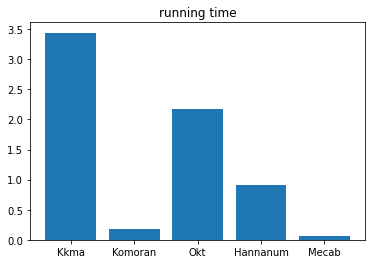

In [60]:
import matplotlib.pyplot as plt
plt.bar(Morph, run_time)
plt.title("running time")
plt.show()

In [79]:
original  = pd.read_csv('../TOP_ZIPUP_2019.txt', sep = "\n", engine='python', encoding = "utf8")
df = original.dropna(axis = 0).reset_index()
del(df['index'])
df.columns = ['text']
df = df.head(30)

In [68]:
print("원문 :", df['text'][0], "\n")
print("Kkma :", df_Kkma['text'][0], "\n")
print("Komoran :", df_Komoran['text'][0], "\n")
print("Okt :", df_Okt['text'][0], "\n")
print("Hannanum :", df_Hannanum['text'][0], "\n")
print("Mecab :", df_Mecab['text'][0], "\n")

원문 : 나이키 배색반집업후리스	봉봉빈티지 ♥제품명: 나이키 배색반집업후리스 ​ ♥가격: 38000 ​ ♥사이즈: 총길이67센치 어깨단면45센치 가슴단면56센치 ♥제품설명: 컨디션8/10 세탁완료 ​ 95-100... 

Kkma : 나이키 배색 반집 업 후 리스 봉 봉 빈티지 제품명 나이키 배색 반집 업 후 리스 가격 사이즈 총길이 어깨 단면 가슴 단면 제품설명 컨디션 세탁 완료 95-100  

Komoran : 나이키  

Okt : 나이키 배색 집업후 리스 봉봉 빈티 제품 나이키 배색 집업후 리스 가격 사이즈 길이 센치 어깨 단면 센치 가슴 단면 센치 제품 설명 컨디션 세탁 완료  

Hannanum : 나이키 배색반집업후리스 봉봉빈티지 ♥제품명: 나이키 배색반집업후리스 ​ ♥가격: 38000 ​ ♥사이즈: 총길이67센치 어깨단면45센치 가슴단면56센치 ♥제품설명: 세탁완료 ​ 95-100  

Mecab : 나이키 배색 반집 업 후 리스 봉봉 빈티지 품명 나이키 배색 반집 업 후 리스 가격 사이즈 길 센치 어깨 단면 센치 가슴 단면 센치 제품 설명 컨디션 세탁 완료  



## LDA

- 원문

In [81]:
Data = df

tokenized_doc = []
for i in range(len(Data)):
    tokenized_doc.append([x for x in Data['text'][i].split()])
    
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]

import gensim
NUM_TOPICS = 10 # 10개의 토픽, k=0
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

- Kkma

In [82]:
Data = df_Kkma

tokenized_doc = []
for i in range(len(Data)):
    tokenized_doc.append([x for x in Data['text'][i].split()])
    
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]

import gensim
NUM_TOPICS = 10 # 10개의 토픽, k=0
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

- Komoran

In [83]:
Data = df_Komoran

tokenized_doc = []
for i in range(len(Data)):
    tokenized_doc.append([x for x in Data['text'][i].split()])
    
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]

import gensim
NUM_TOPICS = 10 # 10개의 토픽, k=0
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

- Okt

In [84]:
Data = df_Okt

tokenized_doc = []
for i in range(len(Data)):
    tokenized_doc.append([x for x in Data['text'][i].split()])
    
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]

import gensim
NUM_TOPICS = 10 # 10개의 토픽, k=0
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

- Hannanum

In [85]:
Data = df_Hannanum

tokenized_doc = []
for i in range(len(Data)):
    tokenized_doc.append([x for x in Data['text'][i].split()])
    
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]

import gensim
NUM_TOPICS = 10 # 10개의 토픽, k=0
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

- Mecab

In [86]:
Data = df_Mecab

tokenized_doc = []
for i in range(len(Data)):
    tokenized_doc.append([x for x in Data['text'][i].split()])
    
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]

import gensim
NUM_TOPICS = 10 # 10개의 토픽, k=0
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

## KR Word Rank

In [77]:
List = []
temp = df_Kkma['text']
List.append(temp.tolist())
temp = df_Komoran['text']
List.append(temp.tolist())
temp = df_Okt['text']
List.append(temp.tolist())
temp = df_Hannanum['text']
List.append(temp.tolist())
temp = df_Mecab['text']
List.append(temp.tolist())
texts = List